<a href="https://colab.research.google.com/github/Rahma2015/Time-Series-Task/blob/main/Time_Series_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The goal of task is to predict

---

#future value quantity based on historical data.

#To predict the Quantity for the next 10 days for each product in
#each city.

#Import the necessary Modules:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read the data:

In [ ]:
data=pd.read_csv("/content/projectdata.xlsx - sheet 1.csv")

#Explore Data:

In [ ]:
data.shape

(2995, 8)

In [ ]:
data.head()

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
0,33,16.0,20.0,2021-10-29T03:33:52Z,16.0,product y,Bahary,North
1,30,16.0,20.0,2021-10-23T12:29:27Z,16.0,product y,Dar El-Salam,Cairo
2,2,45.0,30.0,2021-08-03T09:14:16Z,45.0,product z,Miamy,North
3,3,16.0,3.0,2021-08-17T09:00:50Z,16.0,product y,Miamy,North
4,1,45.0,27.0,2021-09-06T19:57:02Z,45.0,product z,Miamy,North


In [ ]:
data.tail()

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
2990,2,99.0,33.0,2022-12-05T09:48:42Z,99.0,product x,Dokki and Mohandessin,Giza
2991,2,99.0,33.0,2022-12-21T00:00:28Z,99.0,product x,Dokki and Mohandessin,Giza
2992,5,45.0,31.0,2022-12-27T08:43:38Z,45.0,product z,Dokki and Mohandessin,Giza
2993,1,99.0,32.0,2022-11-26T09:16:45Z,0.0,product x,El-Agamy,North
2994,2,99.0,33.0,2023-01-06T22:35:26Z,0.0,product x,El-Agamy,North


In [ ]:
data.shape

(2995, 8)

#Sort dataframe according to date since it is time series problem

In [ ]:
sorted_data=data.sort_values('date')

In [ ]:
sorted_data.head()

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
36,5,102.0,33.0,2021-03-31T11:38:58Z,102.0,product x,El-Mokattam,Cairo
12,1,16.0,9.0,2021-04-30T20:56:54Z,16.0,product y,Ain Shams,Cairo
38,10,16.0,9.0,2021-05-08T14:12:52Z,16.0,product y,El-Zaitoun,Cairo
39,10,45.0,22.0,2021-05-08T14:12:52Z,45.0,product z,El-Zaitoun,Cairo
153,10,16.0,20.0,2021-05-22T10:56:31Z,16.0,product y,Bakos,North


In [ ]:
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2995 entries, 36 to 643
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   quantity      2995 non-null   int64  
 1   UnitePrice    2995 non-null   float64
 2   discount      2995 non-null   float64
 3   date          2995 non-null   object 
 4   retail price  2995 non-null   float64
 5   product_name  2995 non-null   object 
 6   area          2970 non-null   object 
 7   city          2995 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 275.1+ KB


In [ ]:
sorted_data.describe()

,quantity,UnitePrice,discount,retail price
count,2995.000000,2995.000000,2995.000000,2995.000000
mean,7.705509,60.555426,25.917225,59.615776
std,100.466019,35.270286,14.124298,36.944778
min,1.000000,10.000000,-1.000000,0.000000
25%,2.000000,16.000000,20.000000,16.000000
50%,3.000000,45.000000,31.000000,45.000000
75%,5.000000,99.000000,33.000000,99.000000
max,5000.000000,102.000000,561.000000,102.000000


#Rename UnitePrice column to 'unit price'

In [ ]:
sorted_data.columns = ['quantity', 'unit price', 'discount', 'date', 'retail price', 'product_name', 'area', 'city']

In [ ]:
sorted_data.columns

Index(['quantity', 'unit price', 'discount', 'date', 'retail price',
       'product_name', 'area', 'city'],
      dtype='object')

#Get date column location and put it into variable

In [ ]:
date_loc=sorted_data.columns.get_loc('date')
date_loc

3

In [ ]:
type(sorted_data.iloc[-1,date_loc])

str

#range of date in dataset:

In [ ]:
print("range of date from:\n",sorted_data.iloc[0,date_loc],"\n to\n",sorted_data.iloc[-1,date_loc])

range of date from:
 2021-03-31T11:38:58Z 
 to
 2023-01-17T09:24:09Z


#convert date column type to datetime type

In [ ]:
sorted_data['date']=pd.to_datetime(sorted_data['date'])
#type(sorted_data.iloc[-1,date_loc])

In [ ]:
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2995 entries, 36 to 643
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   quantity      2995 non-null   int64              
 1   unit price    2995 non-null   float64            
 2   discount      2995 non-null   float64            
 3   date          2995 non-null   datetime64[ns, UTC]
 4   retail price  2995 non-null   float64            
 5   product_name  2995 non-null   object             
 6   area          2970 non-null   object             
 7   city          2995 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(3)
memory usage: 275.1+ KB


#1.Handling duplicated rows:


In [ ]:
duplicated_rows_count=sorted_data.duplicated().sum()
duplicated_rows_count

np.int64(5)

#show the duplicated observations/examples

In [ ]:
duplicated_rows = sorted_data[sorted_data.duplicated(keep=False)]
duplicated_rows

,quantity,unit price,discount,date,retail price,product_name,area,city
1952,1,89.75,31.0,2022-07-04 09:40:12+00:00,99.0,product x,El-Sheikh Zayed,Giza
1953,1,89.75,31.0,2022-07-04 09:40:12+00:00,99.0,product x,El-Sheikh Zayed,Giza
997,3,16.00,12.0,2022-08-21 07:47:59+00:00,16.0,product y,El-Agamy,North
998,3,16.00,12.0,2022-08-21 07:47:59+00:00,16.0,product y,El-Agamy,North
1153,1,99.00,33.0,2022-09-17 12:03:43+00:00,99.0,product x,Sidy Bishr,North
1154,1,99.00,33.0,2022-09-17 12:03:43+00:00,99.0,product x,Sidy Bishr,North
616,30,16.00,19.0,2022-10-31 12:17:34+00:00,16.0,product y,Miamy,North
614,30,16.00,19.0,2022-10-31 12:17:34+00:00,16.0,product y,Miamy,North
620,10,45.00,31.0,2022-11-05 16:01:30+00:00,45.0,product z,Miamy,North
619,10,45.00,31.0,2022-11-05 16:01:30+00:00,45.0,product z,Miamy,North


In [ ]:
sorted_data = sorted_data.drop_duplicates()

In [ ]:
sorted_data.shape

(2990, 8)

#data visualization before processing

#Heatmap to detect missing values in columns

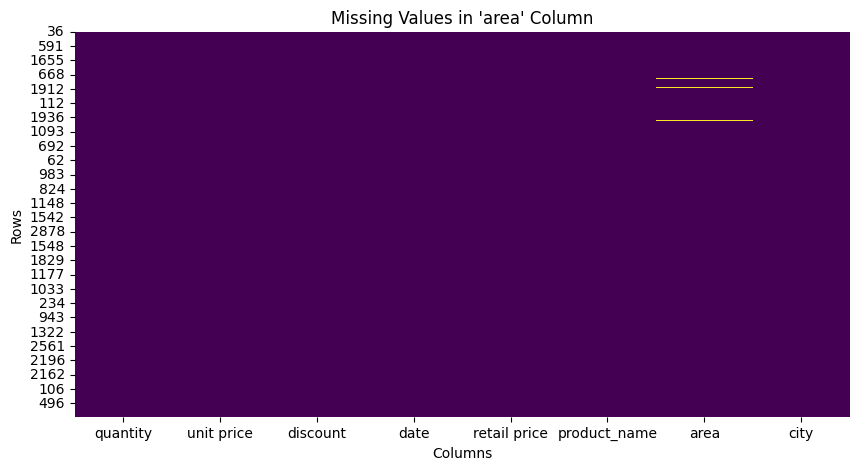

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(sorted_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in 'area' Column")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

#Target (Quantity) Trend over time using line plot

#I want to plot the sum of 'quantity' for each date(unique date).
#and since there are duplicated dates (code above), I made group by


---



#first,check for duplicated dates


In [ ]:
# Check for duplicated dates
duplicated_dates_count = sorted_data['date'].duplicated().sum()
duplicated_dates_count

np.int64(154)

#Aggregates data by date, which makes it easier to see trends over time.


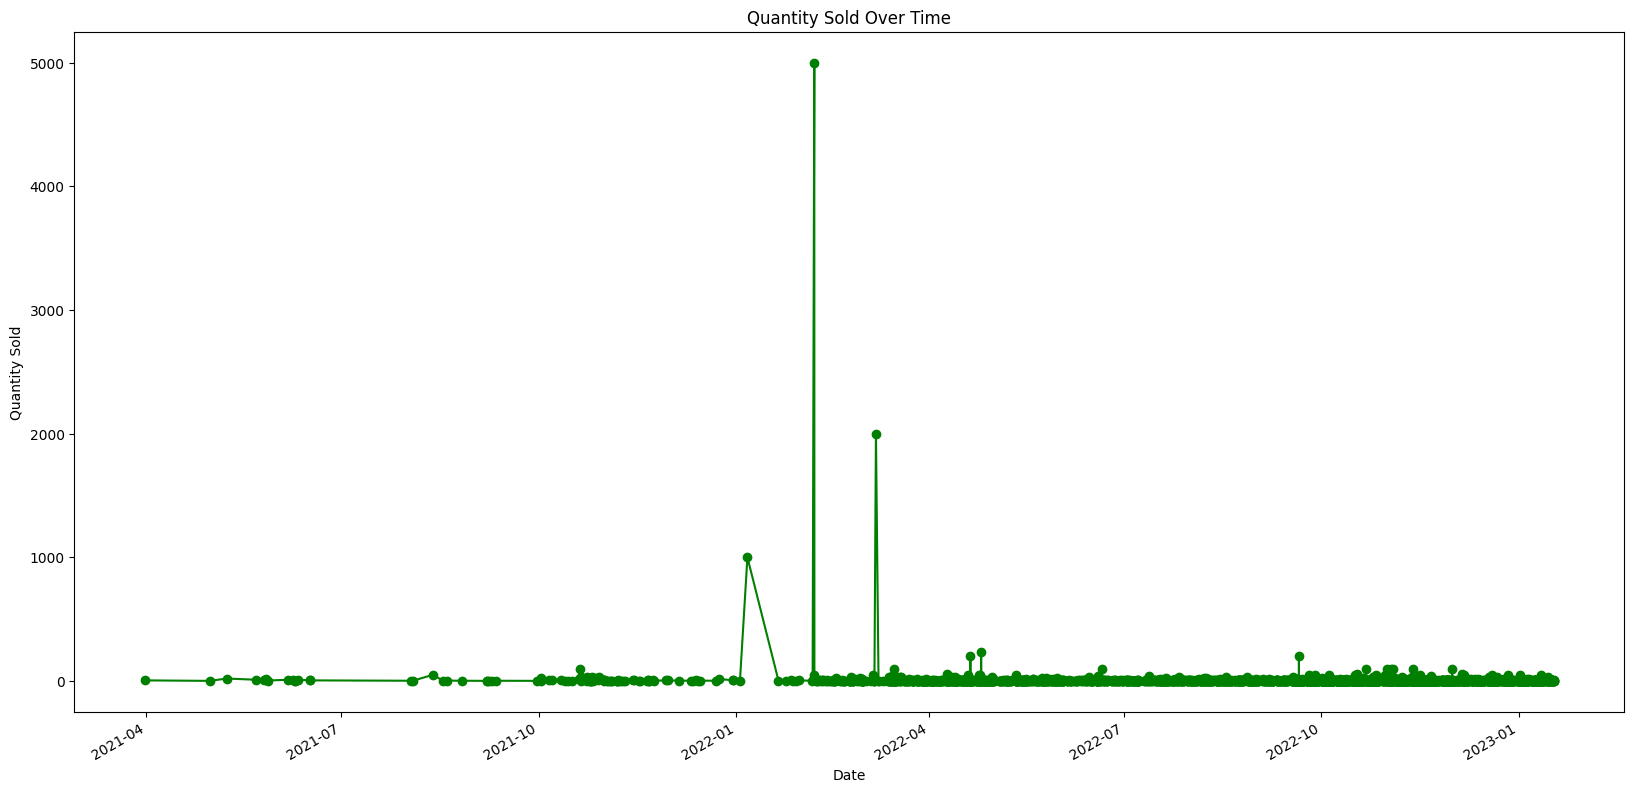

In [ ]:
import matplotlib.pyplot as plt

sorted_data.groupby('date')['quantity'].sum().plot(figsize=(20,10),marker='o',color='green')
plt.title('Quantity Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
sorted_data.shape

(2990, 8)

#Since it is a time series forecasting task and I want to predict the quantity for the next 10 days for each product in each city,I will examine the data separately for each product and city.


---


#This can help understand how the quantity evolves over time.



---


#Why it's important to separate by Product and City:

#Different products may have different trends and seasonality patterns.
#Different cities might exhibit unique demand patterns for the same product, influenced by local factors.
#I put all plots together to help to clarify these differences.



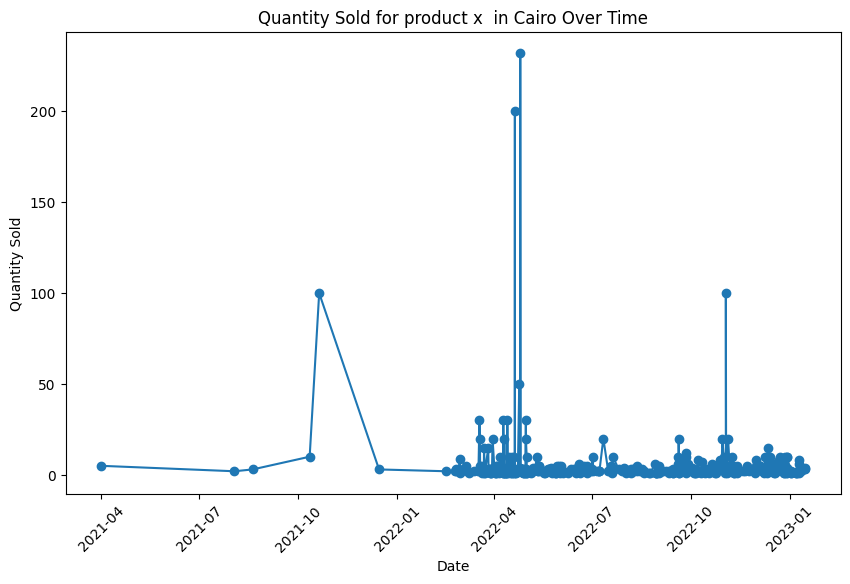

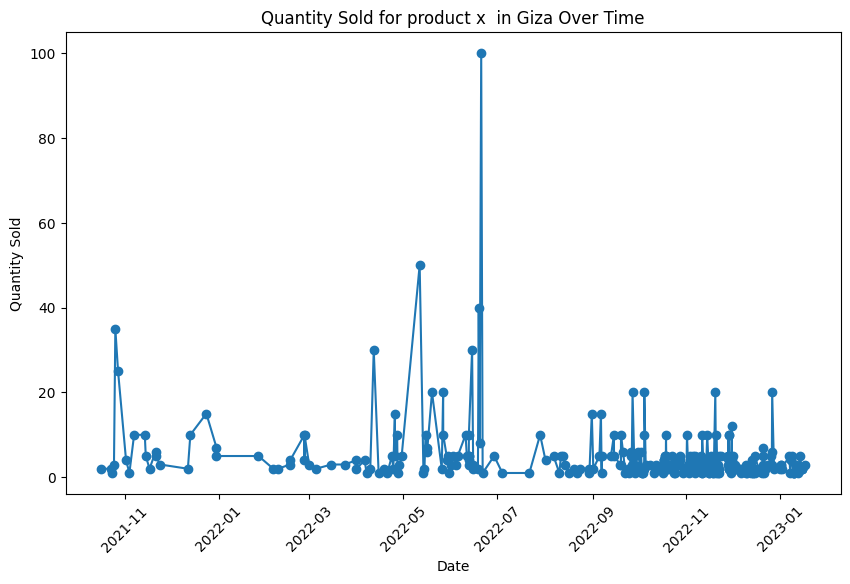

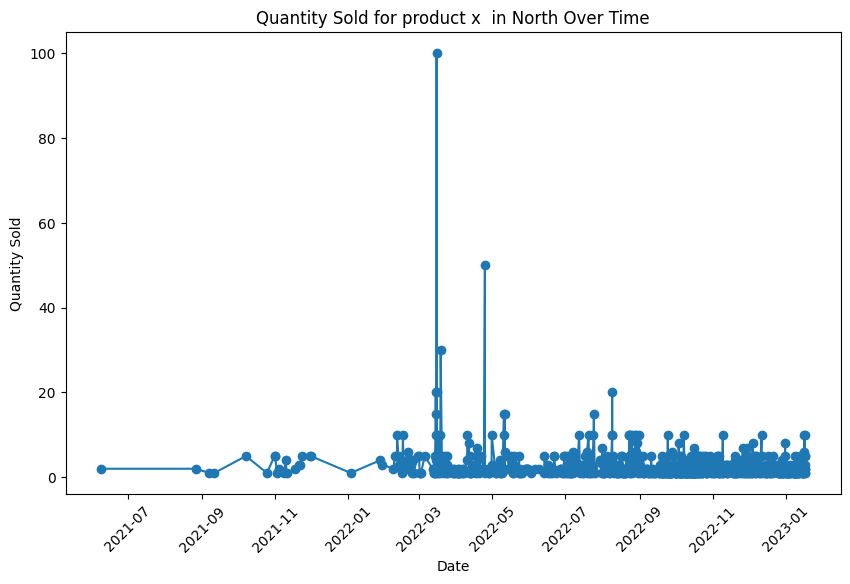

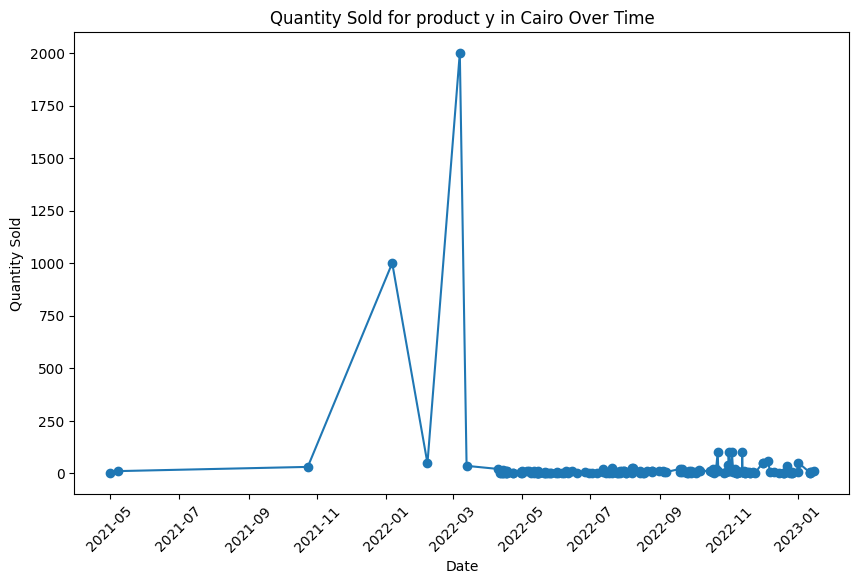

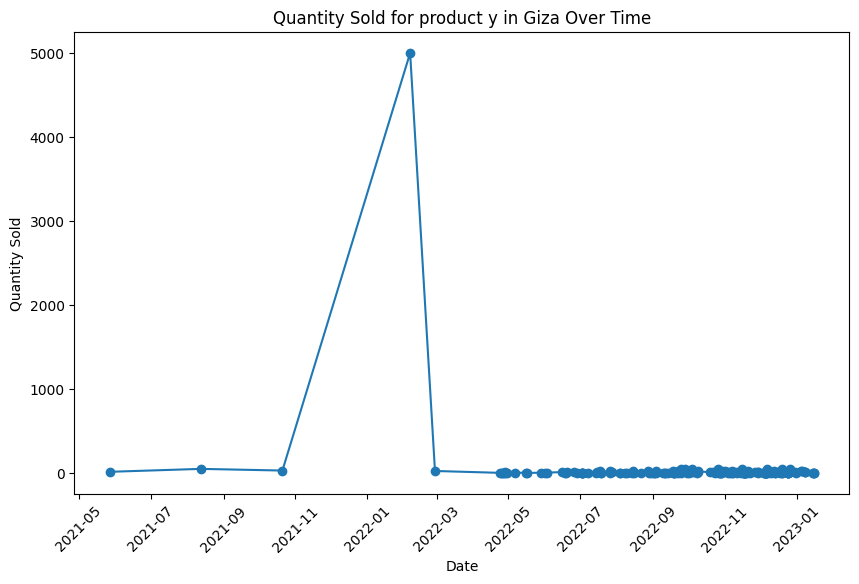

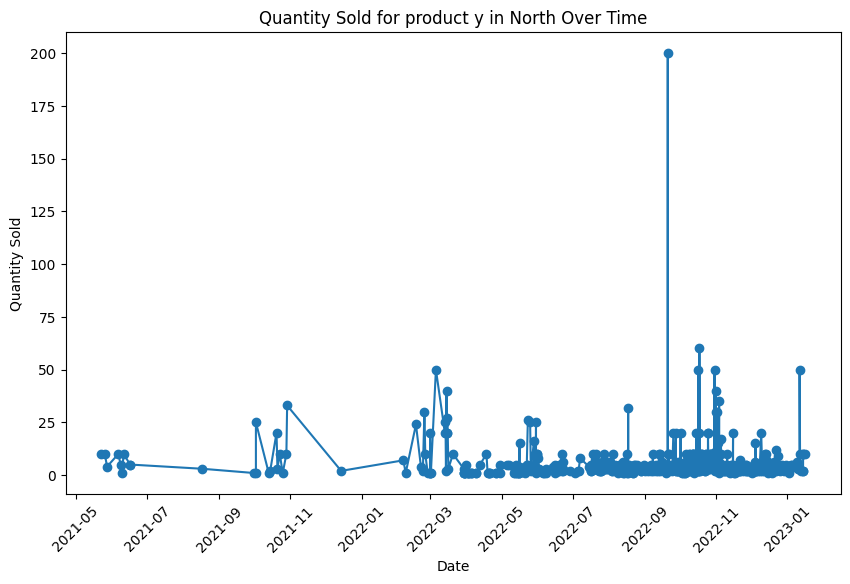

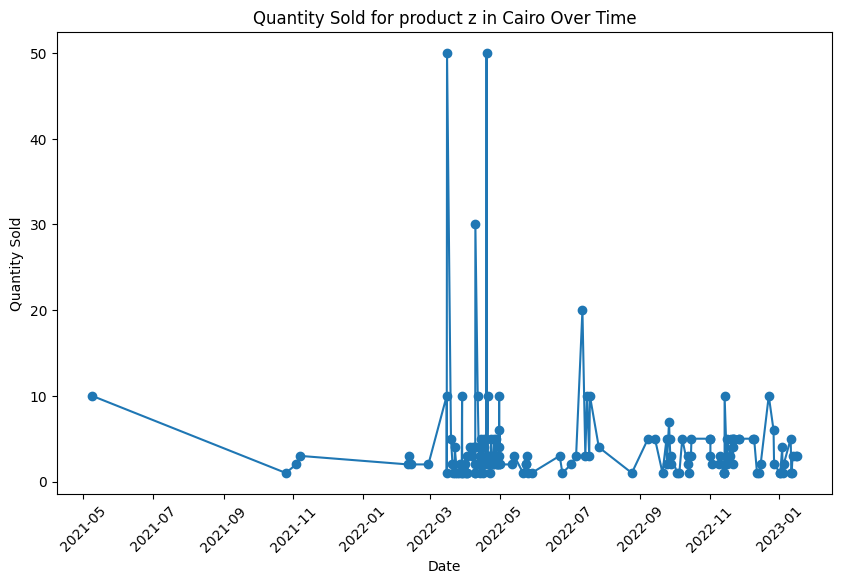

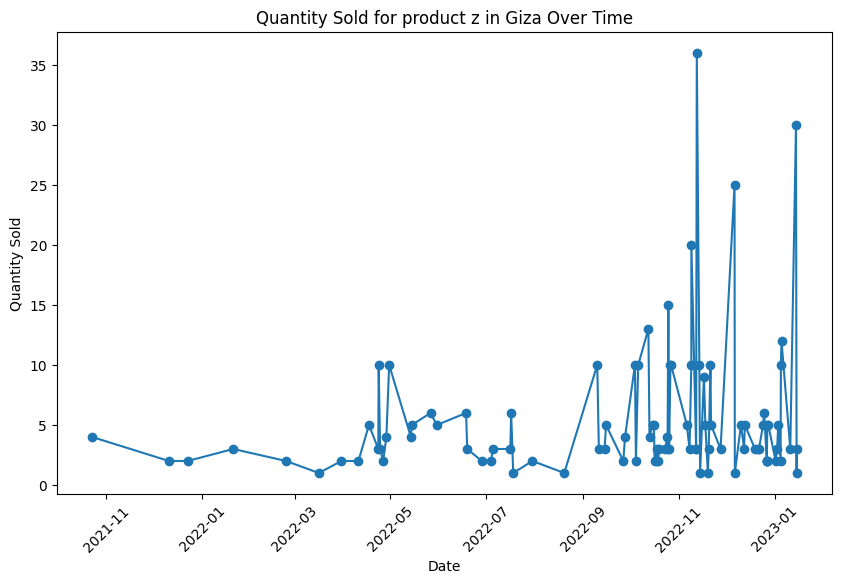

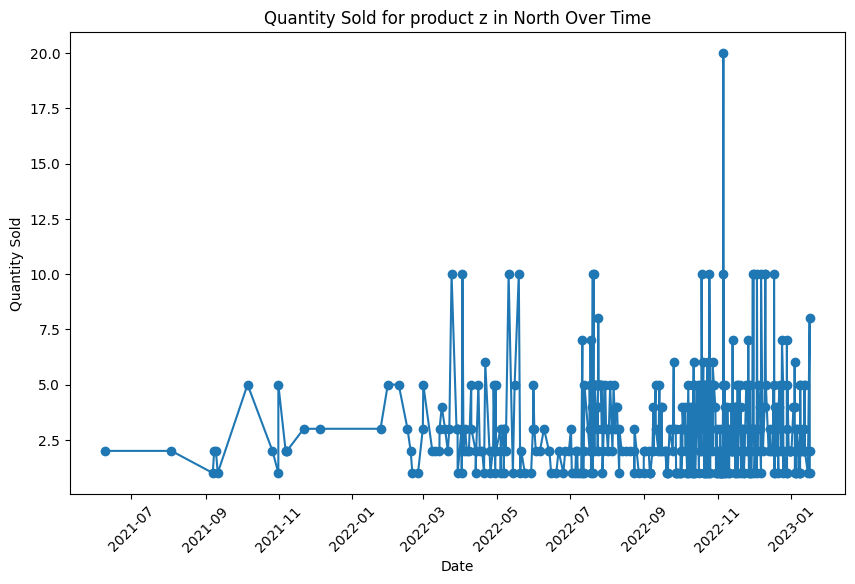

In [ ]:
import matplotlib.pyplot as plt

# Get unique product and city combinations
product_city_combinations = sorted_data.groupby(['product_name', 'city'])
print(product_city_combinations)
# Loop through each product-city combination and plot the date VS it
for (product, city), group in product_city_combinations:
    plt.figure(figsize=(10, 6))
    plt.plot(group['date'], group['quantity'], marker='o')
    plt.title(f'Quantity Sold for {product} in {city} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.show()


#Processing:

#1.Handling missing values:

In [ ]:
sorted_data.isnull().sum()

,0
quantity,0
unit price,0
discount,0
date,0
retail price,0
product_name,0
area,25
city,0


#So,Impute missing area values based on the most frequent area within the same city.

In [ ]:
#to calculate the most frequent value (mode) for area within each city
area_mode = sorted_data.groupby('city')['area'].apply(lambda x: x.mode().iloc[0])
area_mode.head()

,area
city,
Cairo,Nasr City
Giza,El-Sheikh Zayed
North,El-Agamy


In [ ]:
#Apply Imputation
sorted_data['area'] = sorted_data.groupby('city')['area'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

#making sure there is no nulls now

In [ ]:
sorted_data.isnull().sum()

,0
quantity,0
unit price,0
discount,0
date,0
retail price,0
product_name,0
area,0
city,0


#2.Investigate and handling strange values(un realistic values):

#numerical columns

In [ ]:
# Count rows where 'unit price' is negative
strange_unitPrice_count = (sorted_data['unit price'] <= 0).sum()
strange_unitPrice_count

np.int64(0)

In [ ]:
# Count rows where 'quantity' is zero or negative
strange_quantity_count = (sorted_data['quantity'] <= 0).sum()
strange_quantity_count

np.int64(0)

In [ ]:
# Count rows where 'retail price' is  negative
negative_retailprice_count = (sorted_data['retail price'] < 0).sum()
negative_retailprice_count

np.int64(0)

In [ ]:
zero_retailprice =sorted_data[sorted_data['retail price'] == 0]
zero_retailprice

,quantity,unit price,discount,date,retail price,product_name,area,city
1139,1,89.75,24.0,2022-07-31 13:11:22+00:00,0.0,product x,Sidy Bishr,North
387,1,89.75,23.0,2022-08-02 10:34:20+00:00,0.0,product x,El-Asafra,North
2528,3,89.75,23.0,2022-08-03 10:10:07+00:00,0.0,product x,El-Amreya,North
1778,2,89.75,23.0,2022-08-07 08:16:00+00:00,0.0,product x,Smouha,North
2957,1,99.00,30.0,2022-08-13 09:13:26+00:00,0.0,product x,El-Ibrahimia,North
...,...,...,...,...,...,...,...,...
1484,6,99.00,33.0,2023-01-16 10:12:46+00:00,0.0,product x,El-Agamy,North
2819,10,22.00,24.0,2023-01-16 12:48:39+00:00,0.0,product y,El-Mandara,North
1752,10,99.00,33.0,2023-01-16 13:32:18+00:00,0.0,product x,El-Seyouf,North
1802,10,99.00,33.0,2023-01-16 15:25:11+00:00,0.0,product x,El-Seyouf,North


We may flag rows with zero retail price
To indicate whether the original retail price was zero for potential model adjustments (if needed)*
if these rows replaced/dropped

In [ ]:
#sorted_data['is_zero_retail_price'] = (sorted_data['retail price'] == 0).astype(int)
#sorted_data.head()

#In most cases with pricing data, the median is a safer choice unless the data is very clean and normally distributed.



In [ ]:
# Impute retail price with median of the same product and city
sorted_data['retail price'] = sorted_data.groupby(['product_name', 'city'])['retail price'].transform(lambda x: x.replace(0, x.median()))


#check after processing(imputation):

In [ ]:
zero_retail_price_count = (sorted_data['retail price'] == 0).sum()
print(f"Rows with zero retail price:\n{zero_retail_price_count}")

Rows with zero retail price:
0


#We shouldn't have discount smaller than 0 or larger than 100

In [ ]:
strange_discount_count = ((sorted_data['discount'] > 100) | (sorted_data['discount'] <0)).sum()
strange_discount_count

np.int64(2)

In [ ]:
discount_lower_zero=sorted_data[(sorted_data['discount'] <0) ]
discount_lower_zero

,quantity,unit price,discount,date,retail price,product_name,area,city
927,2,16.0,-1.0,2022-02-22 12:25:53+00:00,16.0,product y,El-Seyouf,North


In [ ]:
discount_above_hundred=sorted_data[(sorted_data['discount'] >100) ]
discount_above_hundred

,quantity,unit price,discount,date,retail price,product_name,area,city
1415,5,89.75,561.0,2022-06-21 14:52:02+00:00,99.0,product x,El-Mandara,North


#Imputation with median:

---
Since the strange values seem to be rare, replacing them with the median discount will preserve the data integrity and avoid data loss.
The median is robust against outliers and represents the central tendency of the discount column.



In [ ]:
# Calculate the median of valid discounts (0 to 100)
median_discount = sorted_data.loc[(sorted_data['discount'] >= 0) & (sorted_data['discount'] <= 100), 'discount'].median()

# Replace invalid discount values with the median
sorted_data['discount'] = sorted_data['discount'].apply(lambda x: median_discount if x < 0 or x > 100 else x)

In [ ]:
retail_price_unit_price_relation = (sorted_data['retail price'] < sorted_data['unit price']).sum()
print("rows where retail price is lower than unit price: ", retail_price_unit_price_relation ,"rows")

rows where retail price is lower than unit price:  76 rows


#check relation between retail price and unit price

-I made this assumpution
'''Can Having Retail Price Lower Than Unit Price ?"

-having a retail price lower than the unit price could be considered normal or outlier, depending on the context of data and the business logic.

-This can happen because of discounts and Promotions
-Since they are few rows. We can consider it normal (May indicate a temporary loss or special pricing)

-Typically, the unit price refers to the cost to produce and the retail price is the selling price. If the retail price is lower than the unit price, which might happen during discounts.

-But could also point to data entry errors like negative discounts (but I already solved this issue above)



---

We can notice from the code below that rows where retail price is lower than unit price are having quite a big discount.


In [ ]:
# Get rows where retail price is lower than unit price
rows_with_invalid_prices = sorted_data[sorted_data['retail price'] < sorted_data['unit price']]

print(rows_with_invalid_prices.shape)
# Display these rows
rows_with_invalid_prices.head(10)

(76, 8)


,quantity,unit price,discount,date,retail price,product_name,area,city
37,2,102.0,33.0,2021-08-02 14:04:24+00:00,99.00,product x,El-Mokattam,Cairo
103,3,102.0,34.0,2021-08-19 12:58:58+00:00,99.00,product x,Nasr City,Cairo
169,2,102.0,35.0,2021-08-26 10:51:29+00:00,89.75,product x,Moharam Bek,North
5,1,102.0,35.0,2021-09-06 19:57:11+00:00,89.75,product x,Miamy,North
8,1,102.0,36.0,2021-09-10 22:59:34+00:00,89.75,product x,Miamy,North
174,5,102.0,36.0,2021-10-07 12:20:55+00:00,89.75,product x,El-Agamy,North
42,2,102.0,36.0,2021-10-16 09:59:03+00:00,99.00,product x,6th of October,Giza
263,100,102.0,37.0,2021-10-20 10:05:19+00:00,99.00,product x,Heliopolis,Cairo
291,2,102.0,35.0,2021-10-22 22:15:31+00:00,99.00,product x,El-Haram,Giza
154,1,102.0,37.0,2021-10-23 09:38:15+00:00,99.00,product x,Hadayek El-Ahram,Giza


'''
#I decided to leave it as it is Case(the retail price being lower than the unit price in some rows), since they are few rows and also it might happen  due to discounts, promotions, or temporary sales losses.
'''

#note: there are duplicated cases/rows where retail price lower than unit price so the following plot showing 19 points only not 76 points

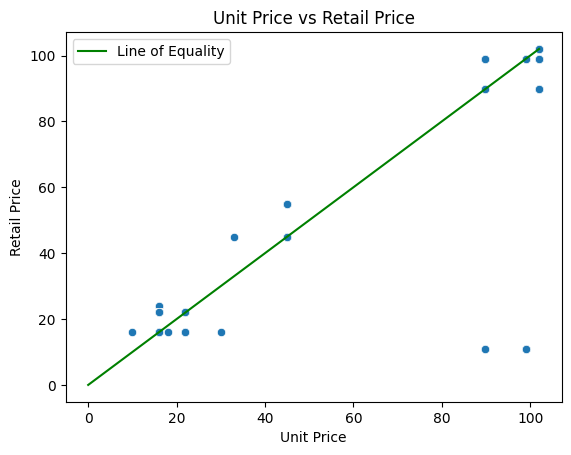

In [ ]:

# Create a scatter plot to check the relationship between unit price and retail price
sns.scatterplot(x='unit price', y='retail price', data=sorted_data)

# Add a title to the plot
plt.title('Unit Price vs Retail Price')

# Label the x-axis as 'Unit Price'
plt.xlabel('Unit Price')

# Label the y-axis as 'Retail Price'
plt.ylabel('Retail Price')

# Add a line of equality (unit price = retail price)
# To do this, we create a range of values from 0 to the max value in the data (retail price and unit price)
max_value = max(sorted_data['unit price'].max(), sorted_data['retail price'].max())
plt.plot([0, max_value], [0, max_value], color='green', label='Line of Equality')

# Display the plot
plt.legend() #to show label
plt.show()

In [ ]:
sorted_data.shape

(2990, 8)

#Categorial columns

#product_name column

check if it has uppercase values.If yes, all values will be converted to lowercase to unify the values.

In [ ]:
#not needed, simple line of code below achieve the
#purpose so I removed it later
'''
# Check if all values in 'Name' column are uppercase
result = all(sorted_data['product_name'].apply(lambda x: x.isupper()))

# Output result as 'Yes' or 'No'
print('Yes' if result==True else 'No')
'''

"\n# Check if all values in 'Name' column are uppercase\nresult = all(sorted_data['product_name'].apply(lambda x: x.isupper()))\n\n# Output result as 'Yes' or 'No'\nprint('Yes' if result==True else 'No')\n"

#we can just use the following code

#To check unique values

#To detect product names with unusual characters or numbers


In [ ]:
unique_products = sorted_data['product_name'].unique()
unique_products

array(['product x ', 'product y', 'product z'], dtype=object)

#area column

In [ ]:
sorted_data.groupby('city')['area'].unique()[0]

<ipython-input-48-4a15d56f8b27>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_data.groupby('city')['area'].unique()[0]


array(['El-Mokattam', 'Ain Shams', 'El-Zaitoun', 'Nasr City',
       'Heliopolis', 'Dar El-Salam', 'El-Matareya', 'El-Maadi',
       'Hadayek El-Kobba', 'New Cairo', 'West El-Balad', 'El-Obour City',
       'Shoubra', 'El-Marg', 'Madinaty', 'Badr City', 'Helwan',
       'El-Salam City', 'Shoubra El-Kheima'], dtype=object)

In [ ]:
sorted_data.groupby('city')['area'].unique()[1]

<ipython-input-49-3744dbb69ed6>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_data.groupby('city')['area'].unique()[1]


array(['Dayrout', 'Shibin El-Kom', '6th of October', 'Hadayek El-Ahram',
       'El-Haram', 'Dokki and Mohandessin', 'Beni Suef City',
       'El-Minia City', 'Faisal', 'El-Sheikh Zayed', 'Imbaba', 'El-Ayyat',
       'Boulaq El-Dakrour', 'Al-Khusus'], dtype=object)

In [ ]:
sorted_data.groupby('city')['area'].unique()[2]

<ipython-input-50-e1e706a406c1>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_data.groupby('city')['area'].unique()[2]


array(['Bakos', 'El-Mandara', 'Miamy', 'Sidy Gaber', 'Damanhur',
       'Moharam Bek', 'El-Agamy', 'El-Montazah', 'Sidy Bishr',
       'El-Seyouf', 'Victoria', 'Bahary', 'El-Mansoura', 'El-Asafra',
       'Roshdy', 'Saba Basha', 'Loran', 'Smouha', 'Zizenia', 'Glym',
       'Fleming', 'Abou Keir', 'Janaklees', 'Stanley', 'Ø¹Ø¬Ù„ÙˆÙ†',
       'El-Werdeyan', 'San Stefano', 'El-Ibrahimia', 'El-Mansheyah',
       'Burj Al-Arab', 'Kafr El-Dawar City', 'Marsa Matrouh',
       'Mahatet El-Raml', 'El-Mahmoudeya', 'Al Sulaimaniyah', 'El-Amreya',
       'Bulkly'], dtype=object)

#NEW_CODE

In [ ]:
sorted_data['area'].value_counts()['Al Sulaimaniyah']
sorted_data = sorted_data[sorted_data['area'] != 'Al Sulaimaniyah']

In [ ]:
sorted_data['area'].value_counts()['Ø¹Ø¬Ù„ÙˆÙ†']

np.int64(3)

In [ ]:
# Filter rows where the 'area' column has the value 'Ø¹Ø¬Ù„ÙˆÙ†'
rows_with_unusual_area = sorted_data[sorted_data['area'] == 'Ø¹Ø¬Ù„ÙˆÙ†']

# Show the filtered rows
print(rows_with_unusual_area)

      quantity  unit price  discount                      date  retail price  \
1654         2       16.00      20.0 2022-03-14 07:57:13+00:00         16.00   
1844         2       89.75      33.0 2022-03-14 21:06:18+00:00         89.75   
1655         1       89.75      33.0 2022-03-16 07:35:48+00:00         89.75   

     product_name        area   city  
1654    product y  Ø¹Ø¬Ù„ÙˆÙ†  North  
1844   product x   Ø¹Ø¬Ù„ÙˆÙ†  North  
1655   product x   Ø¹Ø¬Ù„ÙˆÙ†  North  


#Since they are olny 3 rows with unusual area, and they are all associated with 'North' value in 'city' colum so I will impute this value with most frequent area in 'North'

In [ ]:
# the most frequent 'area' where 'city' is 'North'
most_frequent_area = sorted_data[sorted_data['city'] == 'North']['area'].mode()[0]

# Replace the unusual 'Ø¹Ø¬Ù„ÙˆÙ†' value with the most frequent area
sorted_data['area'] = sorted_data['area'].replace('Ø¹Ø¬Ù„ÙˆÙ†', most_frequent_area)
print(most_frequent_area)

El-Agamy


<ipython-input-54-02feedd00376>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_data['area'] = sorted_data['area'].replace('Ø¹Ø¬Ù„ÙˆÙ†', most_frequent_area)


In [ ]:
sorted_data.groupby('city')['area'].unique()[2]

<ipython-input-55-e1e706a406c1>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_data.groupby('city')['area'].unique()[2]


array(['Bakos', 'El-Mandara', 'Miamy', 'Sidy Gaber', 'Damanhur',
       'Moharam Bek', 'El-Agamy', 'El-Montazah', 'Sidy Bishr',
       'El-Seyouf', 'Victoria', 'Bahary', 'El-Mansoura', 'El-Asafra',
       'Roshdy', 'Saba Basha', 'Loran', 'Smouha', 'Zizenia', 'Glym',
       'Fleming', 'Abou Keir', 'Janaklees', 'Stanley', 'El-Werdeyan',
       'San Stefano', 'El-Ibrahimia', 'El-Mansheyah', 'Burj Al-Arab',
       'Kafr El-Dawar City', 'Marsa Matrouh', 'Mahatet El-Raml',
       'El-Mahmoudeya', 'El-Amreya', 'Bulkly'], dtype=object)

#city column

In [ ]:
# Check for duplicate city values
unique_city_values = sorted_data['city'].unique()
print(f"unique_city_values: {unique_city_values}")

unique_city_values: ['Cairo' 'North' 'Giza']


According to the code below,I see that the frquency of each city is making sense since the 'North' city is combination of different areas in Egypt so it make sense it is the most frequent value



---

may 'North' value be splitted into 2 values 'Alex' and 'other north cities'

In [ ]:
# Check the frequency of each city
city_frequencies = sorted_data['city'].value_counts()
print("City frequencies:")
print(city_frequencies)

City frequencies:
city
North    1742
Cairo     704
Giza      543
Name: count, dtype: int64


#Make the date column the index

In [ ]:
sorted_data.set_index('date',inplace=True)

Make sure:

In [ ]:
sorted_data.head()

,quantity,unit price,discount,retail price,product_name,area,city
date,,,,,,,
2021-03-31 11:38:58+00:00,5,102.0,33.0,102.0,product x,El-Mokattam,Cairo
2021-04-30 20:56:54+00:00,1,16.0,9.0,16.0,product y,Ain Shams,Cairo
2021-05-08 14:12:52+00:00,10,16.0,9.0,16.0,product y,El-Zaitoun,Cairo
2021-05-08 14:12:52+00:00,10,45.0,22.0,45.0,product z,El-Zaitoun,Cairo
2021-05-22 10:56:31+00:00,10,16.0,20.0,16.0,product y,Bakos,North


#Continue data visualization

Purpose of These Visualizations:

-Explore data more and check data trends

-Provide insights into data.

-Guide preprocessing steps like handling outliers.

-Highlight features that influence sales trends.




---



#before processing outliers, plot Quantity sold per product

<ipython-input-60-d666ddfb5656>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products.index, y=products.values, palette="magma")


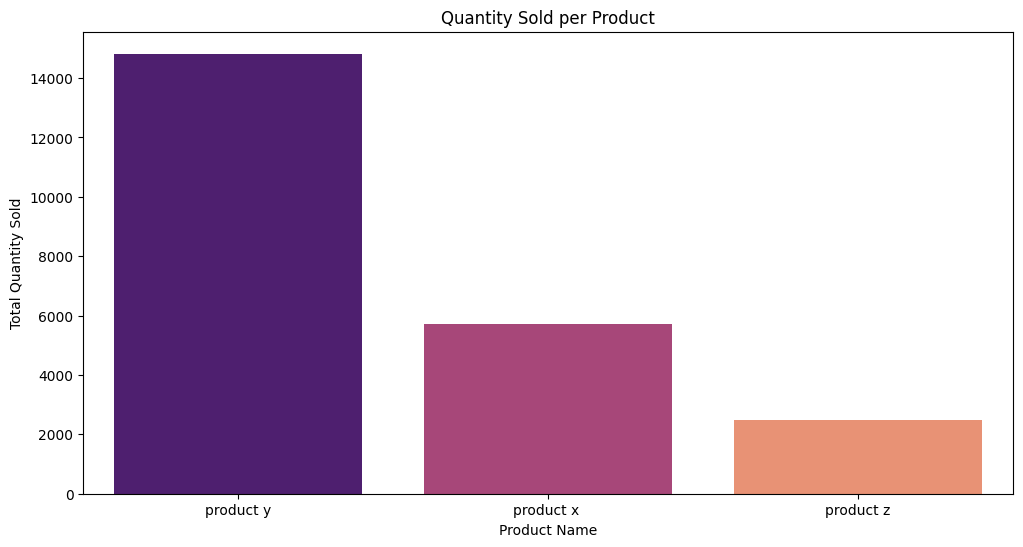

In [ ]:
plt.figure(figsize=(12, 6))
products = sorted_data.groupby('product_name')['quantity'].sum().sort_values(ascending=False)
sns.barplot(x=products.index, y=products.values, palette="magma")
plt.title("Quantity Sold per Product")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.show()

#Total Sales Per City

<ipython-input-61-78010aa4c527>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette="coolwarm")


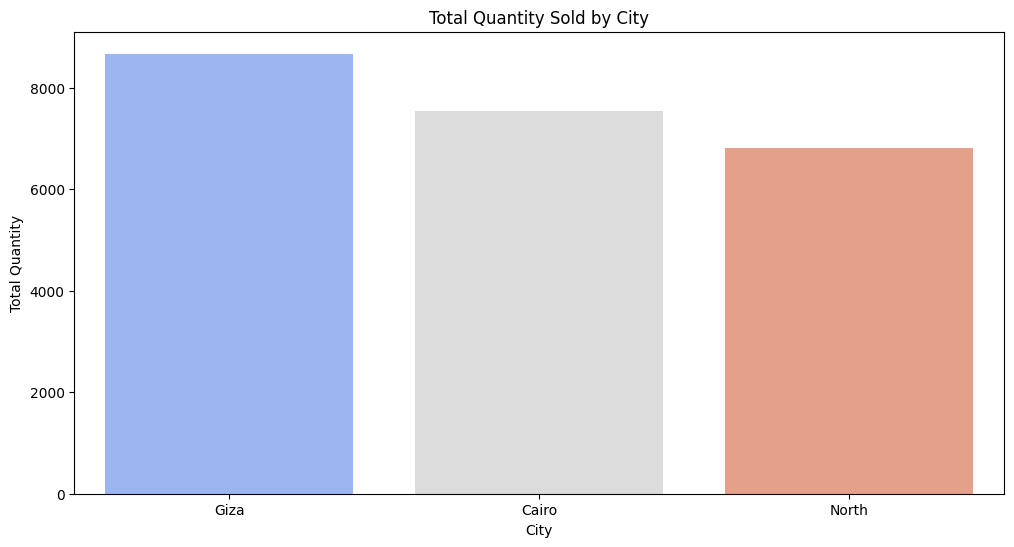

In [ ]:
plt.figure(figsize=(12, 6))
city_sales = sorted_data.groupby('city')['quantity'].sum().sort_values(ascending=False)
sns.barplot(x=city_sales.index, y=city_sales.values, palette="coolwarm")
plt.title("Total Quantity Sold by City")
plt.xlabel("City")
plt.ylabel("Total Quantity")
plt.show()

#Histogram for Distribution (Quantity)

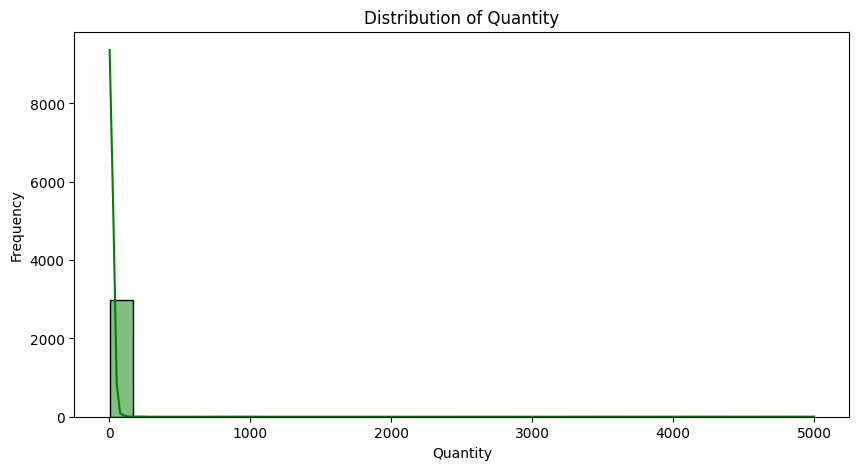

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(sorted_data['quantity'], kde=True, bins=30, color='green')
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

#check for outliers

In [ ]:
sorted_data['quantity'].median()

3.0

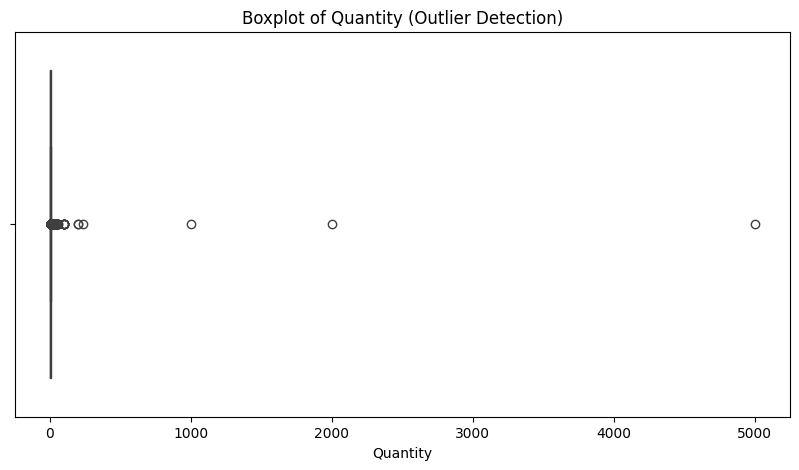

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sorted_data['quantity'])
plt.title("Boxplot of Quantity (Outlier Detection)")
plt.xlabel("Quantity")
plt.show()


#Zoom In to check box of the plot clearly

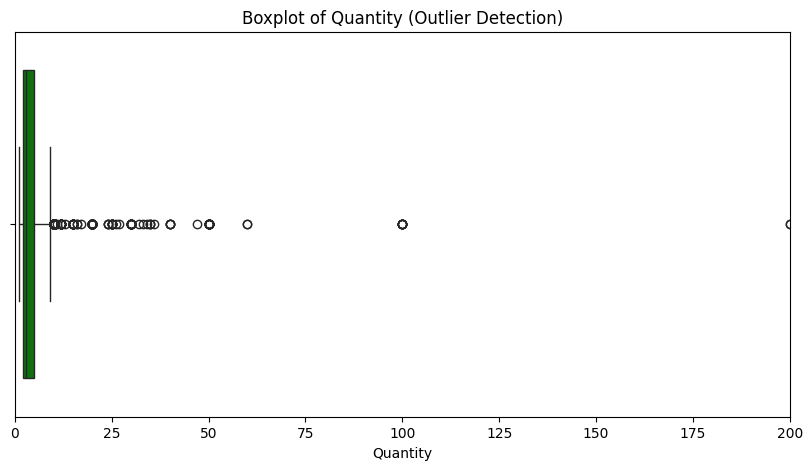

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sorted_data['quantity'],color='green')
plt.title("Boxplot of Quantity (Outlier Detection)")
plt.xlabel("Quantity")
# Adjust the range to focus on the box
plt.xlim(0, 200)
plt.show()

#We can conclude that there are outliers

#1. Box Plot for Quantity by City:


#from this plot, we can say there are multiple outliers in all cities. There are 2 extreme values (might be unrealistic)in Cairo and 1 extreme value in Giza

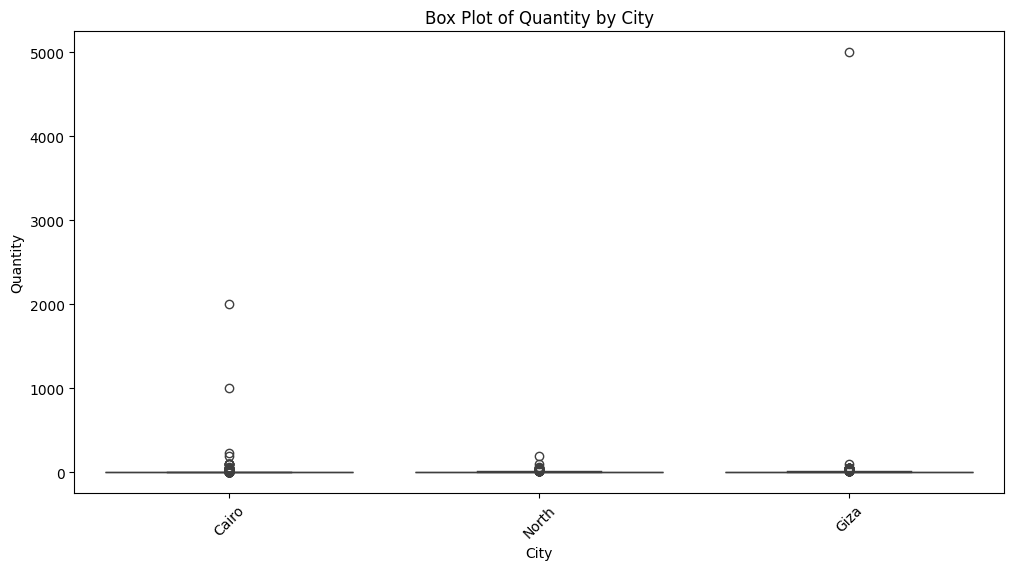

In [ ]:
# Create a box plot for Quantity by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='quantity', data=sorted_data)
plt.title('Box Plot of Quantity by City')
plt.xlabel('City')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate city labels if necessary
plt.show()

#2. Box Plot for Quantity by Product:


#From this plot,we can see that product y has the most extreme values/outliers

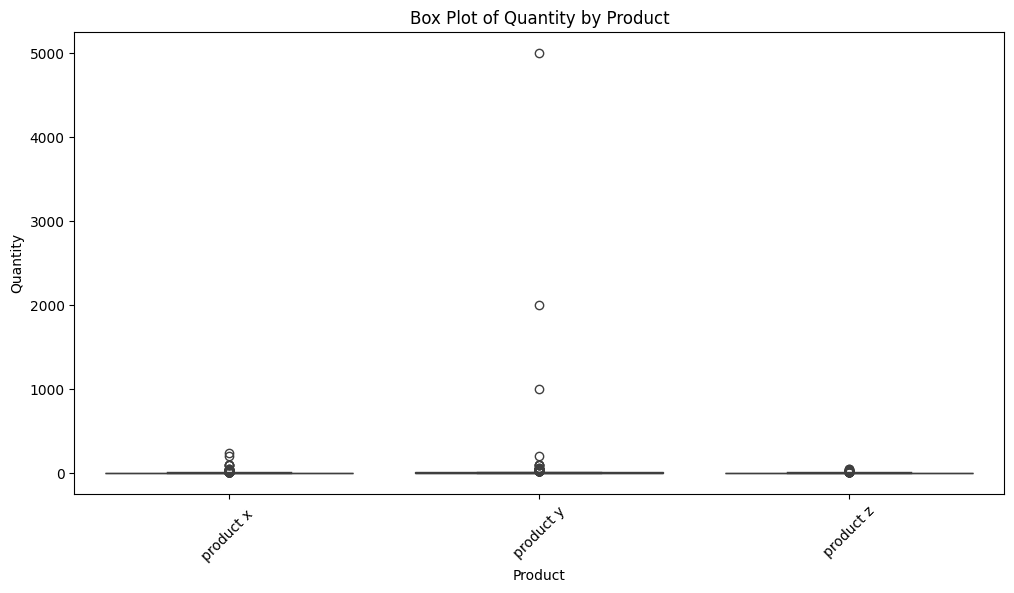

In [ ]:
# Create a box plot for Quantity by Product
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_name', y='quantity', data=sorted_data)
plt.title('Box Plot of Quantity by Product')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotate product labels if necessary
plt.show()

#We can say there are multiple values far from median

#Processing:

#Handling Outliers

Methodologies:

Use the Interquartile Range (IQR) to detect outliers.

There are different ways to handle outliers:

-Winsorization (capping to reasonable thresholds).

-Imputation (replace with median or mean).

-Removal

#Outliers in quantity column

#We can see from boxplot extreme values for quantity that might not be realistic AND high values for quantity that might exist due to discounts.

1.check for extreme values like quantity values >1000

In [ ]:
extreme_values = sorted_data[sorted_data['quantity'] >= 1000]
print(extreme_values)

                           quantity  unit price  discount  retail price  \
date                                                                      
2022-01-06 09:20:30+00:00      1000        16.0      20.0          16.0   
2022-02-06 13:47:49+00:00      5000        16.0       1.0          16.0   
2022-03-07 07:25:34+00:00      2000        16.0      20.0          16.0   

                          product_name       area   city  
date                                                      
2022-01-06 09:20:30+00:00    product y   El-Maadi  Cairo  
2022-02-06 13:47:49+00:00    product y   El-Haram   Giza  
2022-03-07 07:25:34+00:00    product y  Nasr City  Cairo  


I think/assume these 3 values might be errors so I will remove them from dataframe.

They are few rows. One of them (5000) has very low discount (1)

In [ ]:
threshold=1000
sorted_data=sorted_data[sorted_data['quantity'] < threshold]

In [ ]:
sorted_data.shape

(2986, 7)

2-Use the IQR method to detect and define the outliers

In [ ]:
#We also Handle extreme values (replace with median or 99th percentile)
#median_quantity = sorted_data['quantity'].median()
#percentile_99_quantity = data['quantity'].quantile(0.99)

In [ ]:
# Calculate IQR for quantity
Q1 = sorted_data['quantity'].quantile(0.25)  # 25th percentile
Q3 = sorted_data['quantity'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define lower and upper bounds
#no meaning for negative quantity
lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensure the lower bound is at least 0
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 0, Upper Bound: 9.5


Separate Handling for Outliers and Extreme Values
For Outliers (within upper bound but far from median):
Use Winsorization (cap them at the upper bound).

For Extreme Values (beyond the upper bound):
We can replace with a reasonable value, such as:
The median or 99th percentile of the quantity column.

number of values that above upper bound

In [ ]:
quantity_above_upperbound_count=(sorted_data['quantity'] > upper_bound).sum()
quantity_above_upperbound_count

np.int64(381)

In [ ]:
sorted_data['quantity'] = np.where(sorted_data['quantity'] > upper_bound, upper_bound,
                                   np.where(sorted_data['quantity'] < lower_bound, lower_bound, sorted_data['quantity']))

<ipython-input-74-4ff2dec41c0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_data['quantity'] = np.where(sorted_data['quantity'] > upper_bound, upper_bound,


#visualization after processing outlier data

#check

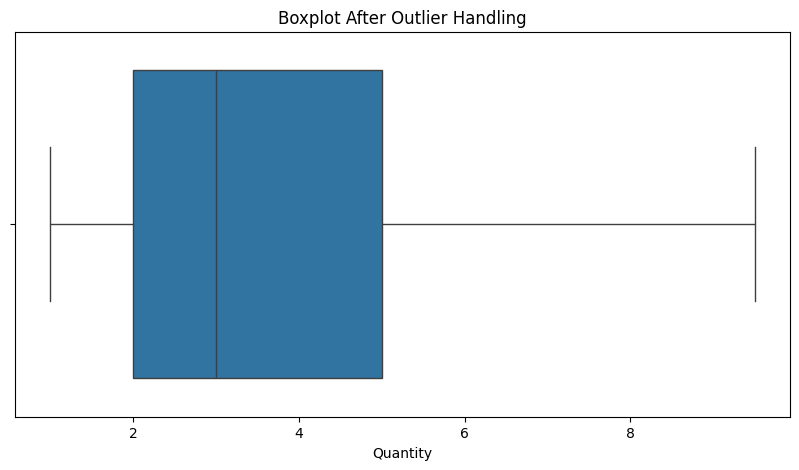

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sorted_data['quantity'])
plt.title("Boxplot After Outlier Handling")
plt.xlabel("Quantity")
plt.show()

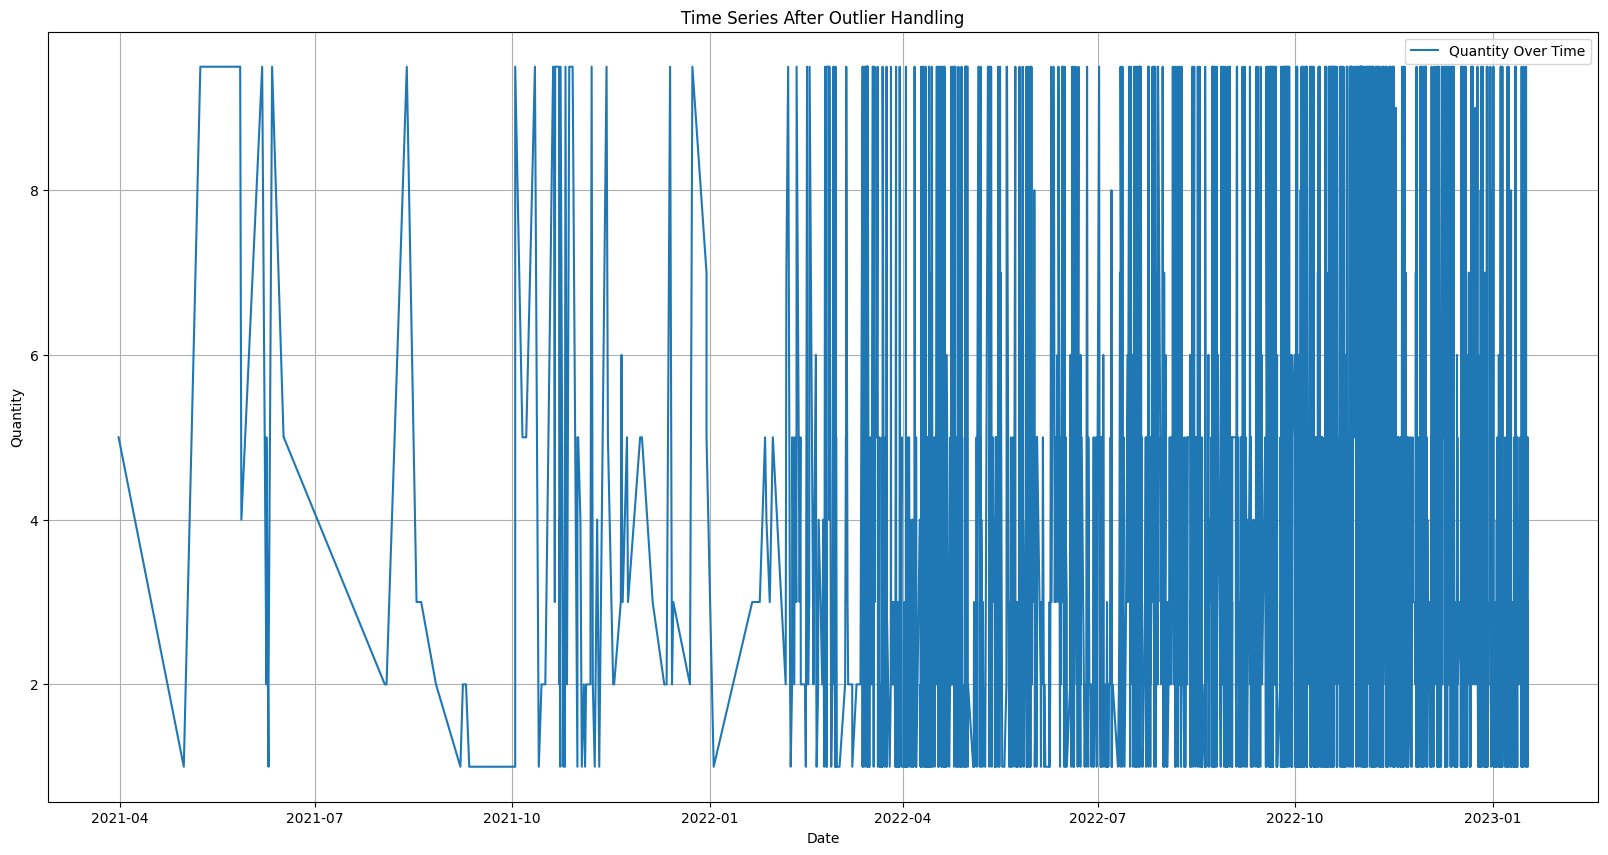

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sorted_data.index, sorted_data['quantity'], label='Quantity Over Time')
plt.title('Time Series After Outlier Handling')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
#plt.xlim(0, 400)
plt.show()

 #Histogram or Density Plot:

    I Plot a histogram or kernel density estimate (KDE) to visualize the overall distribution of the data after handling outliers.
    Ensure the distribution remains realistic and aligns with the task requirements .

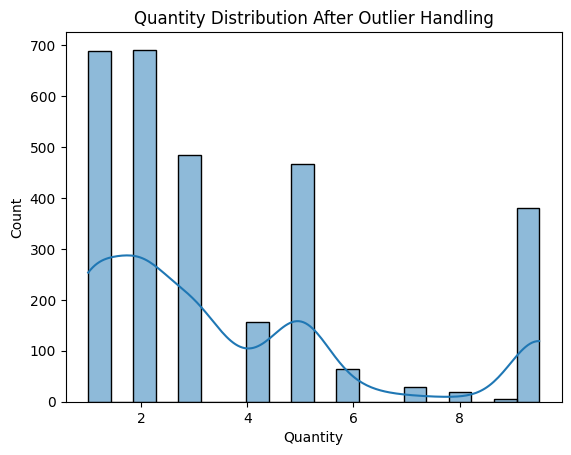

In [ ]:
sns.histplot(sorted_data['quantity'], kde=True, bins=20)
plt.title('Quantity Distribution After Outlier Handling')
plt.xlabel('Quantity')
plt.show()

#After pricessing We can see that products x, y is the top selling product according to this plot


In [ ]:
sorted_data.head()

,quantity,unit price,discount,retail price,product_name,area,city
date,,,,,,,
2021-03-31 11:38:58+00:00,5.0,102.0,33.0,102.0,product x,El-Mokattam,Cairo
2021-04-30 20:56:54+00:00,1.0,16.0,9.0,16.0,product y,Ain Shams,Cairo
2021-05-08 14:12:52+00:00,9.5,16.0,9.0,16.0,product y,El-Zaitoun,Cairo
2021-05-08 14:12:52+00:00,9.5,45.0,22.0,45.0,product z,El-Zaitoun,Cairo
2021-05-22 10:56:31+00:00,9.5,16.0,20.0,16.0,product y,Bakos,North


<ipython-input-79-d666ddfb5656>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products.index, y=products.values, palette="magma")


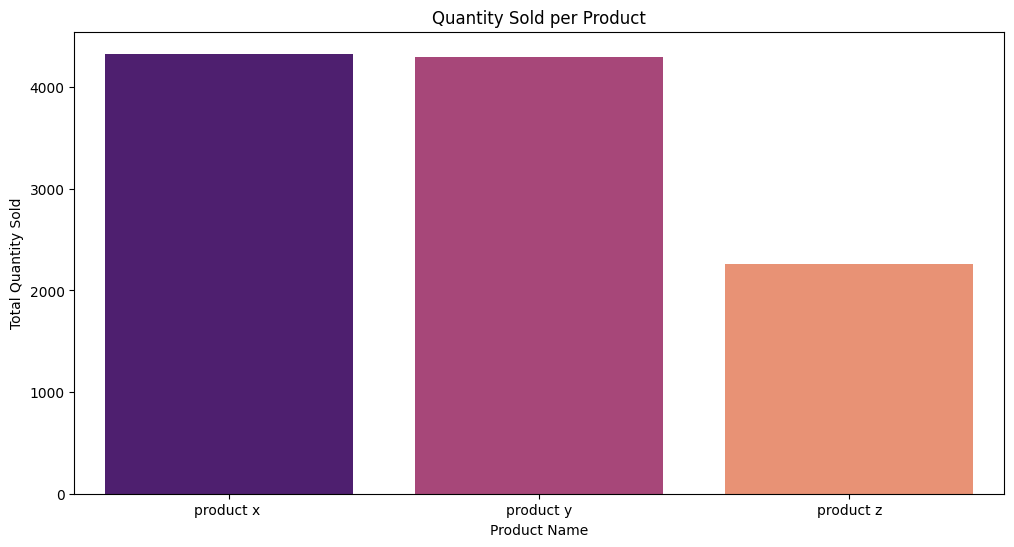

In [ ]:
plt.figure(figsize=(12, 6))
products = sorted_data.groupby('product_name')['quantity'].sum().sort_values(ascending=False)
sns.barplot(x=products.index, y=products.values, palette="magma")
plt.title("Quantity Sold per Product")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.show()


In [ ]:
products

,quantity
product_name,
product x,4329.5
product y,4299.5
product z,2261.5


In [ ]:
sorted_data.groupby('product_name')['quantity'].sum()

,quantity
product_name,
product x,4329.5
product y,4299.5
product z,2261.5


#Total Sales Per City



---


#We can say from this plot that people of North buys the most quantity.

#before processing it was (Giza)





<ipython-input-82-78010aa4c527>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette="coolwarm")


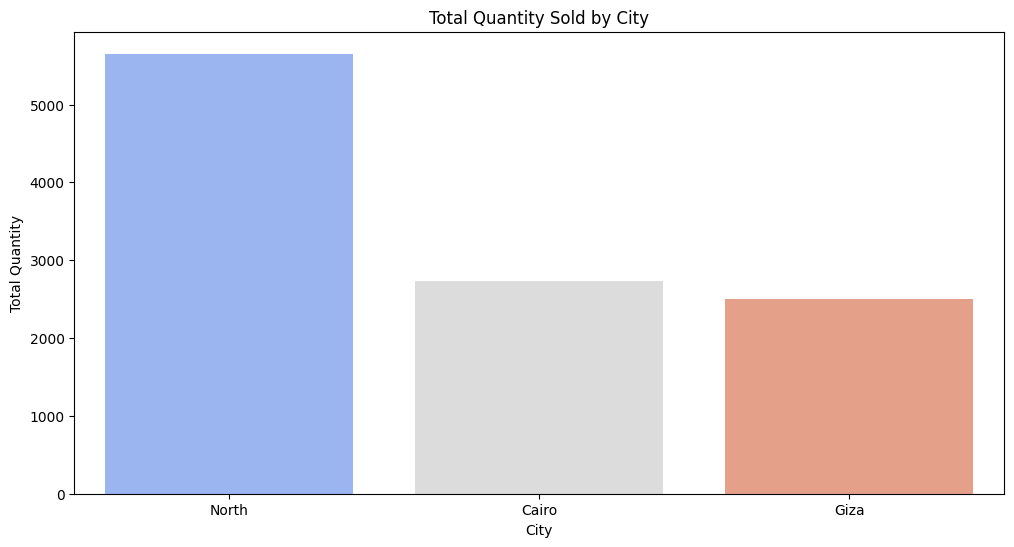

In [ ]:
plt.figure(figsize=(12, 6))
city_sales = sorted_data.groupby('city')['quantity'].sum().sort_values(ascending=False)
sns.barplot(x=city_sales.index, y=city_sales.values, palette="coolwarm")
plt.title("Total Quantity Sold by City")
plt.xlabel("City")
plt.ylabel("Total Quantity")
plt.show()



---



This component exhibits a repetitive and cyclical pattern over time. Such patterns indicate the presence of seasonality in the data.

<Figure size 1200x800 with 0 Axes>

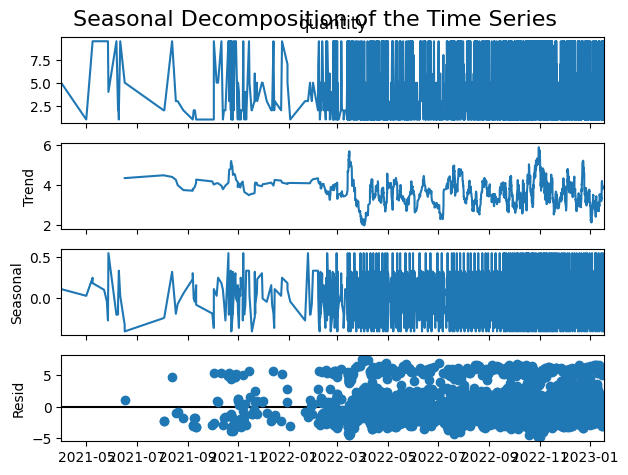

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
# Step 1: Decompose the time series to detect seasonality
result = seasonal_decompose(sorted_data['quantity'], model='additive', period=30)  # Adjust `period` if necessary

# Plot the decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Seasonal Decomposition of the Time Series', fontsize=16)
plt.show()



At this plot, the initial few lags have significant peaks, but they taper off gradually:

While the decomposition plot strongly suggests seasonality, the ACF plot is less conclusive in this case. The data might still have seasonality, but it could be subtle or not perfectly periodic.

<Figure size 1200x600 with 0 Axes>

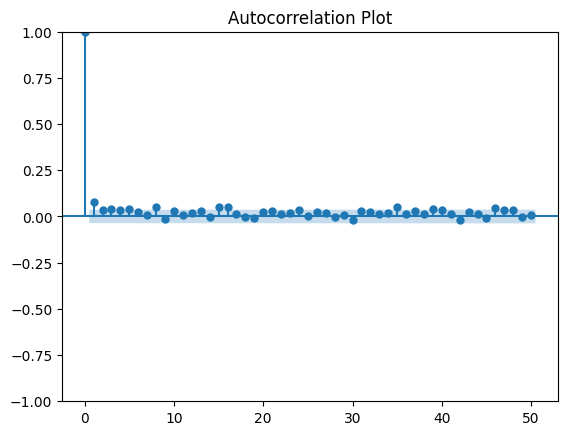

In [ ]:
# Step 2: Autocorrelation analysis
plt.figure(figsize=(12, 6))
plot_acf(sorted_data['quantity'], lags=50)  # Adjust `lags` based on your data
plt.title('Autocorrelation Plot')
plt.show()

# Sales by Day of Week

<ipython-input-85-0738cb10ba88>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")


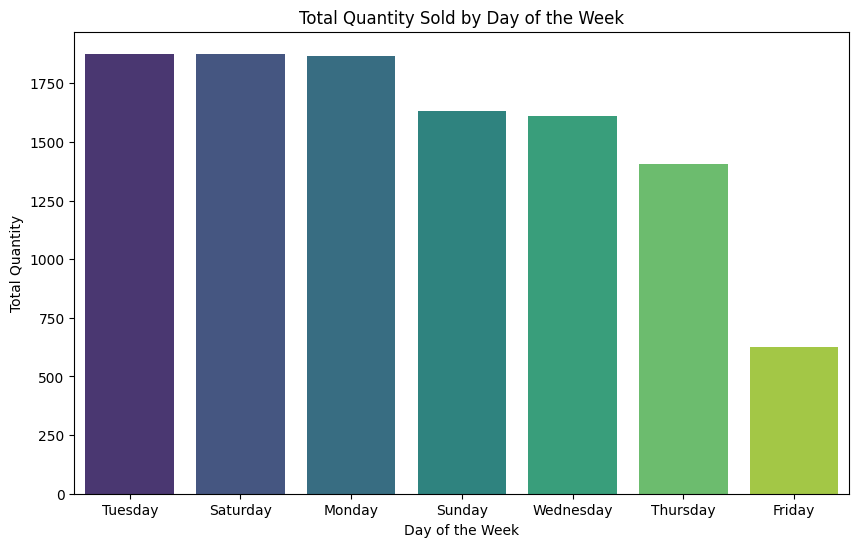

In [ ]:
# Create the 'day_of_week' column from the index
sorted_data['day_of_week'] = sorted_data.index.day_name()

# Group by day of the week and sum quantities
weekday_sales = sorted_data.groupby('day_of_week')['quantity'].sum().sort_values(ascending=False)

# To edit order of days according to week in Egypt
#weekday_sales = weekday_sales.reindex(['Saturday', 'Sunday','Monday', 'Tuesday' ,'Wednesday', 'Thursday', 'Friday'], fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")
plt.title("Total Quantity Sold by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Quantity")
plt.show()

#Sales Trend by Month

#The plot shows clear variations in sales across the months, with peaks in October and November. This suggests a potential seasonal pattern in the data. This insight is critical for your forecasting model, as incorporating seasonality could improve accuracy.



---




#Might because of black friday (novmber sales). Might this is one of the factors.

<ipython-input-86-160a5adf8fa8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="plasma")


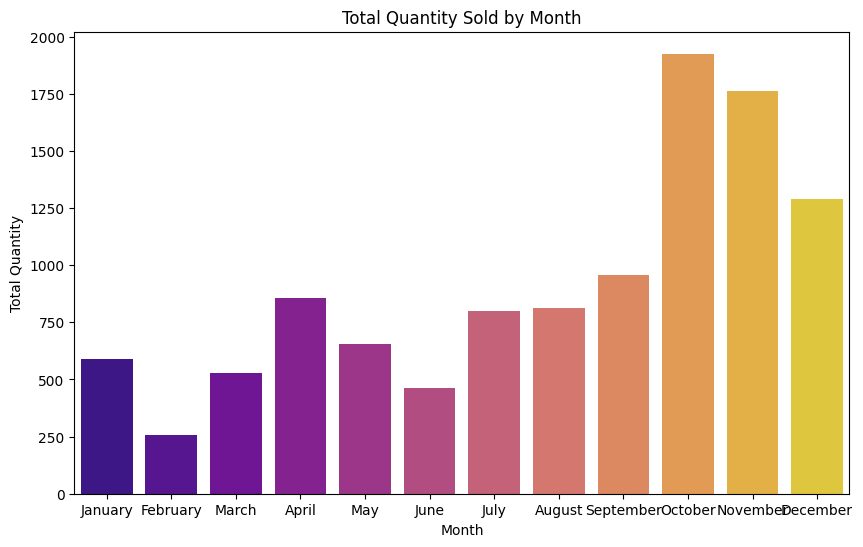

In [ ]:
#sorted_data['month'] = sorted_data.index.month_name()
sorted_data['month'] = sorted_data.index.to_series().dt.month_name()
plt.figure(figsize=(10, 6))
monthly_sales = sorted_data.groupby('month')['quantity'].sum()
monthly_sales = monthly_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July',  'August', 'September', 'October', 'November', 'December'])
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="plasma")
plt.title("Total Quantity Sold by Month")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.show()

#Quantity sold in each city for each product

In [ ]:
sorted_data.groupby(['city','product_name'])['quantity'].sum()

city   product_name
Cairo  product x       1247.5
       product y        978.5
       product z        506.0
Giza   product x       1078.5
       product y       1002.0
       product z        425.0
North  product x       2003.5
       product y       2319.0
       product z       1330.5
Name: quantity, dtype: float64

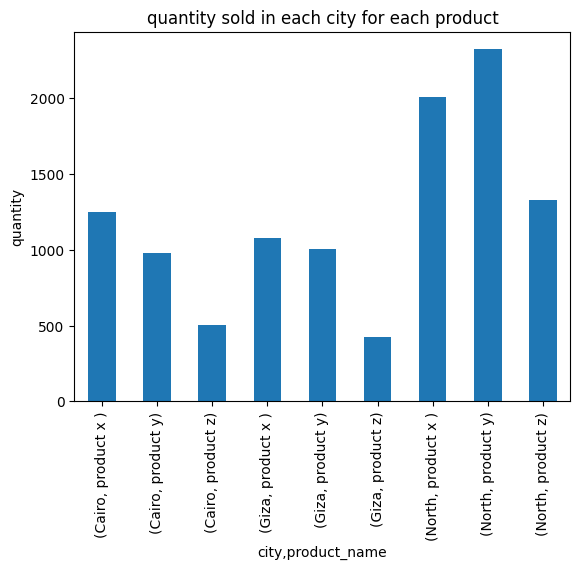

In [ ]:
sorted_data.groupby(['city','product_name'])['quantity'].sum().plot(kind='bar')
plt.xlabel("city,product_name")
plt.ylabel("quantity")
plt.title("quantity sold in each city for each product")
plt.show()



---



In [ ]:
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2986 entries, 2021-03-31 11:38:58+00:00 to 2023-01-17 09:24:09+00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   quantity      2986 non-null   float64
 1   unit price    2986 non-null   float64
 2   discount      2986 non-null   float64
 3   retail price  2986 non-null   float64
 4   product_name  2986 non-null   object 
 5   area          2986 non-null   object 
 6   city          2986 non-null   object 
 7   day_of_week   2986 non-null   object 
 8   month         2986 non-null   object 
dtypes: float64(4), object(5)
memory usage: 233.3+ KB


#Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['product_name', 'area', 'city']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    sorted_data[col] = le.fit_transform(sorted_data[col])
    label_encoders[col] = le

#Encode day of week and month columns

In [ ]:
sorted_data = pd.get_dummies(sorted_data, columns=['day_of_week', 'month'], prefix=['day', 'month'], drop_first=True)

In [ ]:
sorted_data.head()

,quantity,unit price,discount,retail price,product_name,area,city,day_Monday,day_Saturday,day_Sunday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
date,,,,,,,,,,,,,,,,,,,,,
2021-03-31 11:38:58+00:00,5.0,102.0,33.0,102.0,0,29,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2021-04-30 20:56:54+00:00,1.0,16.0,9.0,16.0,1,2,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021-05-08 14:12:52+00:00,9.5,16.0,9.0,16.0,1,36,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2021-05-08 14:12:52+00:00,9.5,45.0,22.0,45.0,2,36,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2021-05-22 10:56:31+00:00,9.5,16.0,20.0,16.0,1,6,2,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
sorted_data.describe()

,quantity,unit price,discount,retail price,product_name,area,city
count,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000
mean,3.647187,60.602813,25.762254,61.245981,0.758205,35.659745,1.348292
std,2.714966,35.260020,10.177193,36.128158,0.803140,17.117588,0.835112
min,1.000000,10.000000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,2.000000,16.000000,20.000000,16.000000,0.000000,19.000000,1.000000
50%,3.000000,45.000000,31.000000,45.000000,1.000000,34.000000,2.000000
75%,5.000000,99.000000,33.000000,99.000000,1.000000,52.000000,2.000000
max,9.500000,102.000000,100.000000,102.000000,2.000000,67.000000,2.000000


In [ ]:
sorted_data.head()

,quantity,unit price,discount,retail price,product_name,area,city,day_Monday,day_Saturday,day_Sunday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
date,,,,,,,,,,,,,,,,,,,,,
2021-03-31 11:38:58+00:00,5.0,102.0,33.0,102.0,0,29,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2021-04-30 20:56:54+00:00,1.0,16.0,9.0,16.0,1,2,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021-05-08 14:12:52+00:00,9.5,16.0,9.0,16.0,1,36,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2021-05-08 14:12:52+00:00,9.5,45.0,22.0,45.0,2,36,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2021-05-22 10:56:31+00:00,9.5,16.0,20.0,16.0,1,6,2,False,True,False,...,False,False,False,False,False,False,True,False,False,False


#Feature engineering

In [ ]:
sorted_data['quarter'] = sorted_data.index.quarter



In [ ]:
#  lag features
def create_lag_features(df, lag_days, target_column='quantity'):
    for lag in range(1, lag_days + 1):
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    return df

In [ ]:
#  rolling features
def create_rolling_features(df, window_sizes, target_column='quantity'):
    for window in window_sizes:
        df[f'{target_column}_rolling_mean_{window}'] = df[target_column].rolling(window=window).mean()
        df[f'{target_column}_rolling_std_{window}'] = df[target_column].rolling(window=window).std()
    return df


In [ ]:
#feature engineering
sorted_data = create_lag_features(sorted_data, lag_days=7)
sorted_data = create_rolling_features(sorted_data, window_sizes=[3, 7])

#NEW_CODE

In [ ]:
lag_cols = [col for col in sorted_data.columns if '_lag_' in col]  # Get all lag columns
for col in lag_cols:
    sorted_data[col] = sorted_data[col].ffill()  # Forward fill existing values
    sorted_data.fillna(sorted_data[col].dropna().iloc[0], inplace=True)  # Fill remaining NaNs with first valid value


In [ ]:
sorted_data.head(3)

,quantity,unit price,discount,retail price,product_name,area,city,day_Monday,day_Saturday,day_Sunday,...,quantity_lag_2,quantity_lag_3,quantity_lag_4,quantity_lag_5,quantity_lag_6,quantity_lag_7,quantity_rolling_mean_3,quantity_rolling_std_3,quantity_rolling_mean_7,quantity_rolling_std_7
date,,,,,,,,,,,,,,,,,,,,,
2021-03-31 11:38:58+00:00,5.0,102.0,33.0,102.0,0,29,0,False,False,False,...,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.00000,5.0,5.0
2021-04-30 20:56:54+00:00,1.0,16.0,9.0,16.0,1,2,0,False,False,False,...,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.00000,5.0,5.0
2021-05-08 14:12:52+00:00,9.5,16.0,9.0,16.0,1,36,0,False,True,False,...,5.0,5.0,5.0,5.0,5.0,5.0,5.166667,4.25245,5.0,5.0


In [ ]:
len(sorted_data.columns)

36

#Spliting data

In [ ]:
sorted_data.columns

Index(['quantity', 'unit price', 'discount', 'retail price', 'product_name',
       'area', 'city', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'quarter', 'quantity_lag_1',
       'quantity_lag_2', 'quantity_lag_3', 'quantity_lag_4', 'quantity_lag_5',
       'quantity_lag_6', 'quantity_lag_7', 'quantity_rolling_mean_3',
       'quantity_rolling_std_3', 'quantity_rolling_mean_7',
       'quantity_rolling_std_7'],
      dtype='object')

In [ ]:
# Define the target and features
target = 'quantity'
excluded_columns=['quantity','is_zero_retail_price']
features = [col for col in sorted_data.columns if col not in excluded_columns ]

# Split into train/test
train_data = sorted_data[sorted_data.index < '2021-10-20']
test_data = sorted_data[sorted_data.index >= '2021-10-20']

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

#Modeling

#Train model

In [ ]:
#print(y_train.describe())
#print("Variance:", y_train.var())

In [ ]:
from lightgbm import LGBMRegressor

# Adjust LightGBM parameters for small datasets and avoid ignored parameters
model = LGBMRegressor(
    objective='regression',
    metric='rmse',
    boosting_type='gbdt',
    num_leaves=10,               # Reduce the number of leaves for simpler trees
    min_data_in_leaf=5,          # Minimum data in a leaf
    max_depth=5,                 # Restrict tree depth for better splits
    learning_rate=0.05,          # Slower learning rate for stable training
    n_estimators=200,            # Use more estimators for better results
    random_state=42,
    verbose=-1                   # Suppress unnecessary warnings
)


# Train the model
model.fit(X_train, y_train)


LGBMRegressor(learning_rate=0.05, max_depth=5, metric='rmse',
              min_data_in_leaf=5, n_estimators=200, num_leaves=10,
              objective='regression', random_state=42, verbose=-1)

#Test

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")



Test RMSE: 5.1191
Test MAE: 1.7593


In [ ]:
len(sorted_data.columns)

36

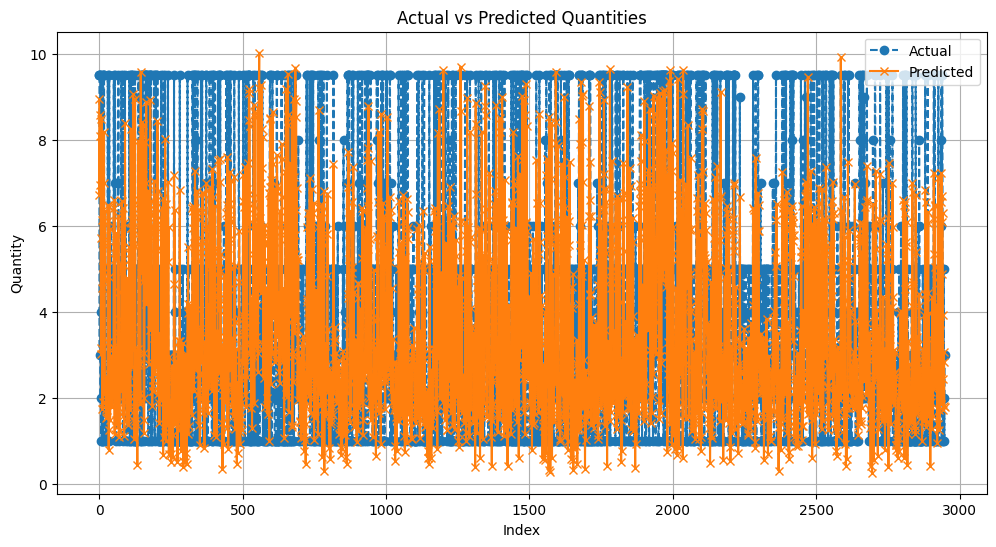

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', linestyle='--')
plt.plot(y_pred, label='Predicted', marker='x', linestyle='-')
plt.title("Actual vs Predicted Quantities")
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.show()




---



In [ ]:
from datetime import timedelta


def forecast_next_10_days(model, data, feature_columns, start_date, products, cities):
    predictions = []
    future_data = data.copy()

    for day in range(1, 11):  # Forecasting 10 days
        forecast_date = start_date + timedelta(days=day)

        daily_predictions = []
        for product in products:
            for city in cities:
                new_row = {'date': forecast_date, 'product_name': product, 'city': city}

                # Populate feature values
                for col in feature_columns:
                    if col in ['date', 'product_name', 'city']:
                        continue
                    elif col.startswith('quantity_lag_'):
                        lag_day = int(col.split('_')[-1])
                        new_row[col] = future_data.loc[(future_data['product_name'] == product) & (future_data['city'] == city), 'quantity'].shift(lag_day).iloc[-1]
                    elif col.startswith('quantity_rolling_mean_'):
                        window = int(col.split('_')[-1])
                        new_row[col] = future_data.loc[(future_data['product_name'] == product) & (future_data['city'] == city), 'quantity'].rolling(window=window).mean().iloc[-1]
                    else:
                        new_row[col] = future_data[col].iloc[-1]

                # Convert to DataFrame for prediction
                feature_df = pd.DataFrame([new_row])
                feature_df['date'] = pd.to_datetime(feature_df['date'])

                # Generate prediction
                pred = model.predict(feature_df[feature_columns])[0]
                new_row['quantity'] = round(pred)
                daily_predictions.append(new_row)

        # Append new predictions to the dataset for subsequent predictions
        future_data = pd.concat([future_data, pd.DataFrame(daily_predictions)], ignore_index=True)
        predictions.extend(daily_predictions)

    forecast_df = pd.DataFrame(predictions).set_index('date')
    return forecast_df


In [ ]:
# Forecast execution
last_date = sorted_data.index.get_level_values(0).max()
products = sorted_data['product_name'].unique()
cities = sorted_data['city'].unique()
print(cities)
feature_columns = features
#print(len(feature_columns))
forecast_df = forecast_next_10_days(model, sorted_data, feature_columns, last_date, products, cities)
print(len(forecast_df.columns))
print(len(sorted_data.columns))



[0 2 1]
36
36


In [ ]:
forecast_df.to_csv('forecast_next_10_days.csv', index=False)

In [ ]:
city_mapping = {i: city for i, city in enumerate(data['city'].unique())}
product_mapping = {i: product for i, product in enumerate(data['product_name'].unique())}

# mapping
forecast_df['city'] = forecast_df['city'].map(city_mapping)
forecast_df['product_name'] = forecast_df['product_name'].map(product_mapping)

print(forecast_df.head())

                          product_name   city  unit price  discount  \
date                                                                  
2023-01-18 09:24:09+00:00    product y  North        99.0      29.0   
2023-01-18 09:24:09+00:00    product y   Giza        99.0      29.0   
2023-01-18 09:24:09+00:00    product y  Cairo        99.0      29.0   
2023-01-18 09:24:09+00:00    product z  North        99.0      29.0   
2023-01-18 09:24:09+00:00    product z   Giza        99.0      29.0   

                           retail price  area  day_Monday  day_Saturday  \
date                                                                      
2023-01-18 09:24:09+00:00          99.0    37       False         False   
2023-01-18 09:24:09+00:00          99.0    37       False         False   
2023-01-18 09:24:09+00:00          99.0    37       False         False   
2023-01-18 09:24:09+00:00          99.0    37       False         False   
2023-01-18 09:24:09+00:00          99.0    37       

In [ ]:
median_forecast = forecast_df.groupby(['product_name', 'city'])['quantity'].median().reset_index()
print(median_forecast)

  product_name   city  quantity
0   product x   Cairo       2.0
1   product x    Giza       1.5
2   product x   North       3.0
3    product y  Cairo       2.0
4    product y   Giza       1.5
5    product y  North       3.0
6    product z  Cairo       3.0
7    product z   Giza       6.0
8    product z  North       7.0


In [ ]:
forecast_df.to_csv('forecast_next_10_days.csv', index=False)

#Finally, we can try different things to improve results

#1-use another way in outlier

#2-change in hyperparameter

#3-add more features that might affects the result

#4-use Time-Series Cross-Validation

#5-increase data

#6-Compare the result with other models



---



#we may add total price column to dataframe and check if this affects results

In [ ]:
#sorted_data['total_price']=sorted_data['quantity']*sorted_data['retail price']
#corr=sorted_data['total_price'].corr(sorted_data['quantity'])
#corr
#sorted_data.head()
# Create lag features for total_price
#sorted_data = create_lag_features(sorted_data, lag_days=7, target_column='total_price')

# Create rolling features for total_price
#sorted_data = create_rolling_features(sorted_data, window_sizes=[3, 7], target_column='total_price')

# Drop rows with NaN introduced by lag/rolling
#sorted_data = sorted_data.dropna()

#To be improved:
#Gap in data-Imputation (interpolation)
#Outliers
#Evalute for each product per city. chart/metrics percentages
#Leakage - rolling
=====================================
